In [11]:
import pandas as pd
import numpy as np

# Given values (from earlier results)
# Original Best Portfolio
monthly_return_original = 0.025478
monthly_volatility_original = 0.058718
monthly_sharpe_original = 0.351004

# Robust Best Portfolio
monthly_return_robust = 0.025480
monthly_volatility_robust = 0.059648
monthly_sharpe_robust = 0.352198

# Annualizing the metrics
def annualize_metrics(monthly_return, monthly_volatility, monthly_sharpe, annual_risk_free_rate):
    annual_return = (1 + monthly_return) ** 12 - 1
    annual_volatility = monthly_volatility * np.sqrt(12)
    annual_sharpe = (annual_return - annual_risk_free_rate) / annual_volatility
    return annual_return, annual_volatility, annual_sharpe

# For Original
annual_return_original, annual_volatility_original, annual_sharpe_original_corrected = annualize_metrics(
    monthly_return_original, monthly_volatility_original, monthly_sharpe_original, 0.06
)

# For Robustness
annual_return_robust, annual_volatility_robust, annual_sharpe_robust_corrected = annualize_metrics(
    monthly_return_robust, monthly_volatility_robust, monthly_sharpe_robust, 0.055
)

# Creating a beautiful comparison table
comparison_table = pd.DataFrame({
    'Metric': ['Annual Return', 'Annual Volatility', 'Annual Sharpe Ratio'],
    'Original Best Portfolio': [annual_return_original, annual_volatility_original, annual_sharpe_original_corrected],
    'Robustness Best Portfolio': [annual_return_robust, annual_volatility_robust, annual_sharpe_robust_corrected]
})

# Display nicely
print("\nAnnualized Metrics Comparison Table:")
display(comparison_table)



Annualized Metrics Comparison Table:


,Metric,Original Best Portfolio,Robustness Best Portfolio
0,Annual Return,0.352434,0.352466
1,Annual Volatility,0.203405,0.206627
2,Annual Sharpe Ratio,1.437694,1.439629


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Resetting everything fresh
np.random.seed(7)

# New risk-free rate
risk_free_rate_annual_new = 0.055  # 5.5% per annum
risk_free_rate_monthly_new = (1 + risk_free_rate_annual_new)**(1/12) - 1  # Convert to monthly

# Number of simulations for robustness
num_portfolios_robustness = 5000

# Lists to store results
robust_returns = []
robust_volatilities = []
robust_sharpe_ratios = []
robust_weights = []
robust_num_stocks = []

# Stock list (same as earlier)
all_stocks = log_returns.columns.tolist()

for _ in range(num_portfolios_robustness):
    num_stocks_selected = np.random.randint(10, 41)  # 10 to 40 stocks
    selected_stocks = np.random.choice(all_stocks, size=num_stocks_selected, replace=False)

    weights = np.random.random(size=num_stocks_selected)
    weights /= np.sum(weights)

    portfolio_return = np.sum(log_returns[selected_stocks].mean() * weights)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(log_returns[selected_stocks].cov(), weights)))

    sharpe_ratio = (portfolio_return - risk_free_rate_monthly_new) / portfolio_volatility

    robust_returns.append(portfolio_return)
    robust_volatilities.append(portfolio_volatility)
    robust_sharpe_ratios.append(sharpe_ratio)
    robust_weights.append(dict(zip(selected_stocks, weights)))
    robust_num_stocks.append(num_stocks_selected)

# Create robustness simulation results dataframe
robust_simulation_results = pd.DataFrame({
    'Return': robust_returns,
    'Volatility': robust_volatilities,
    'Sharpe Ratio': robust_sharpe_ratios,
    'Number of Stocks': robust_num_stocks
})

# Find Best Portfolio from Robustness Check
best_robust_index = robust_simulation_results['Sharpe Ratio'].idxmax()
best_robust_portfolio = robust_simulation_results.loc[best_robust_index]
best_robust_weights = robust_weights[best_robust_index]

# Display
print("\nBest Robust Portfolio Metrics:")
print(best_robust_portfolio)

best_robust_weights_df = pd.DataFrame(best_robust_weights.items(), columns=['Stock', 'Weight'])

# Cap classification
def identify_cap(stock_name):
    if stock_name.startswith('L_'):
        return 'LargeCap'
    elif stock_name.startswith('M_'):
        return 'MidCap'
    elif stock_name.startswith('S_'):
        return 'SmallCap'
    else:
        return 'Unknown'

best_robust_weights_df['Cap Category'] = best_robust_weights_df['Stock'].apply(identify_cap)

robust_cap_allocation = best_robust_weights_df.groupby('Cap Category')['Weight'].sum().reset_index()

print("\nCap-wise Allocation in Best Robust Portfolio:")
print(robust_cap_allocation)



Best Robust Portfolio Metrics:
Return               0.025480
Volatility           0.059648
Sharpe Ratio         0.352198
Number of Stocks    10.000000
Name: 3679, dtype: float64

Cap-wise Allocation in Best Robust Portfolio:
  Cap Category    Weight
0     LargeCap  0.004092
1       MidCap  0.575232
2     SmallCap  0.420676


,Metric,Value
0,Annual Return,0.352429
1,Annual Volatility,0.203403
2,Annual Sharpe Ratio,1.437679
3,Number of Stocks,12.000000


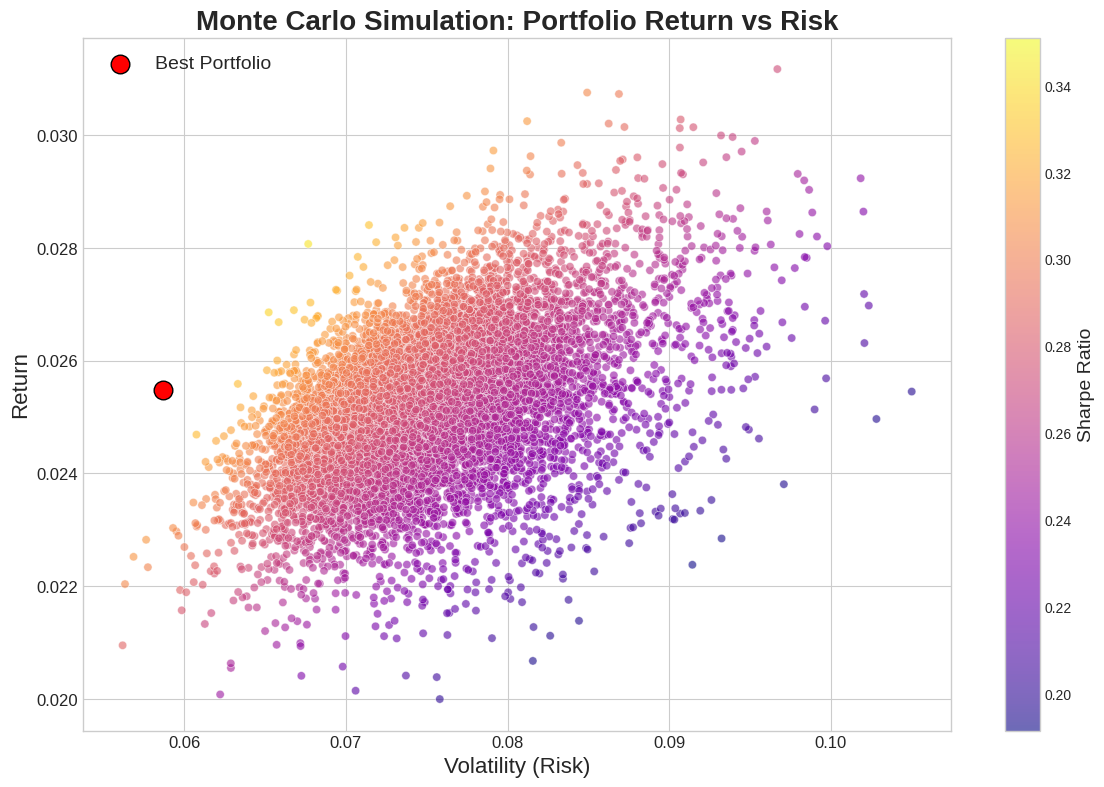

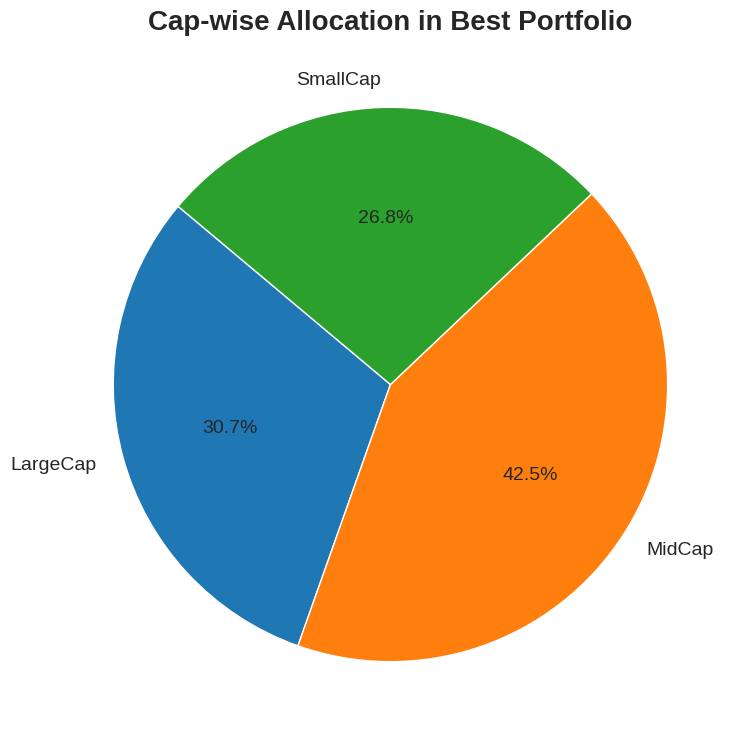

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Use your existing data!
# simulation_results, best_portfolio_index, best_portfolio_weights_df, cap_allocation already exist in your notebook

# Step 1: Annualize Metrics
monthly_return = best_portfolio['Return']
monthly_volatility = best_portfolio['Volatility']
monthly_sharpe = best_portfolio['Sharpe Ratio']

annual_return = (1 + monthly_return) ** 12 - 1
annual_volatility = monthly_volatility * np.sqrt(12)
annual_sharpe = (annual_return - 0.06) / annual_volatility  # subtracting 6% risk-free rate annually

# Clean annualized summary table
annualized_summary_table = pd.DataFrame({
    'Metric': ['Annual Return', 'Annual Volatility', 'Annual Sharpe Ratio', 'Number of Stocks'],
    'Value': [annual_return, annual_volatility, annual_sharpe, int(best_portfolio['Number of Stocks'])]
})

display(annualized_summary_table)

# Step 2: Beautified Scatter Plot
plt.style.use('seaborn-v0_8-whitegrid')  # Updated seaborn style
fig, ax = plt.subplots(figsize=(14, 9))

scatter = ax.scatter(simulation_results['Volatility'], simulation_results['Return'],
                     c=simulation_results['Sharpe Ratio'], cmap='plasma', alpha=0.6, edgecolors='w', linewidths=0.5)

cbar = plt.colorbar(scatter)
cbar.set_label('Sharpe Ratio', fontsize=14)

ax.scatter(simulation_results.loc[best_portfolio_index, 'Volatility'],
           simulation_results.loc[best_portfolio_index, 'Return'],
           color='red', s=180, edgecolors='black', label='Best Portfolio')

ax.set_title('Monte Carlo Simulation: Portfolio Return vs Risk', fontsize=20, weight='bold')
ax.set_xlabel('Volatility (Risk)', fontsize=16)
ax.set_ylabel('Return', fontsize=16)
ax.legend(fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Step 3: Beautified Cap-wise Allocation Pie Chart
fig, ax = plt.subplots(figsize=(9, 9))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Clean, professional color palette

ax.pie(cap_allocation.values, labels=cap_allocation.index, autopct='%1.1f%%',
       startangle=140, colors=colors, textprops={'fontsize': 14}, wedgeprops={'edgecolor': 'white'})

ax.set_title('Cap-wise Allocation in Best Portfolio', fontsize=20, weight='bold')
plt.show()


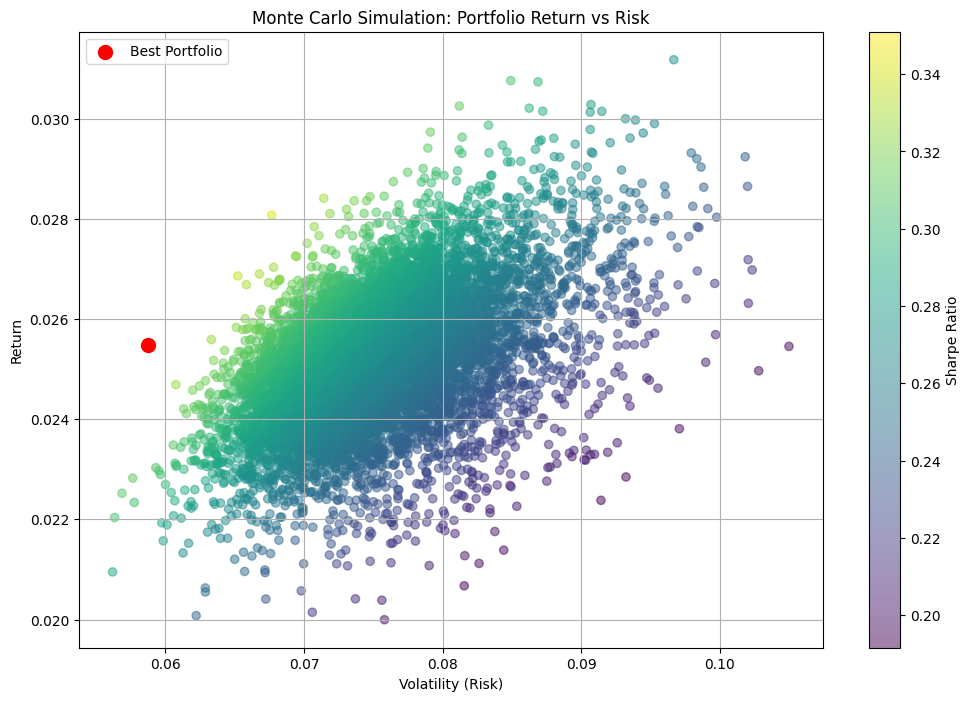

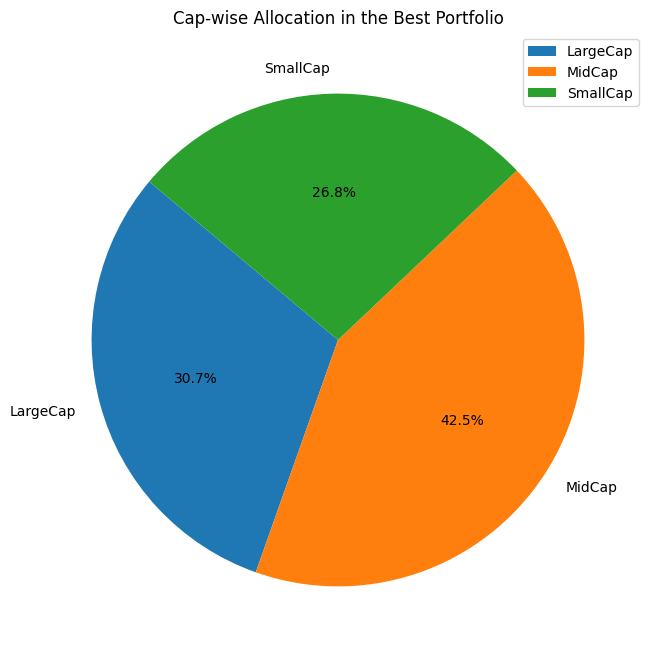


Best Portfolio Summary Table:


,Metric,Value
0,Monthly Return,0.025478
1,Monthly Volatility,0.058718
2,Monthly Sharpe Ratio,0.351004
3,Number of Stocks,12.000000



Cap-wise Allocation Table:


,Cap Category,Weight
0,LargeCap,0.306958
1,MidCap,0.424879
2,SmallCap,0.268163


from matplotlib import pyplot as plt
summary_table['Value'].plot(kind='hist', bins=20, title='Value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
summary_table.groupby('Metric').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Value']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Value'}, axis=1)
              .sort_values('Value', ascending=True))
  xs = counted['Value']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = summary_table.sort_values('Value', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Metric')):
  _plot_series(series, series_name, i)
  fig.legend(title='Metric', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Value')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
summary_table['Value'].plot(kind='line', figsize=(8, 4), title='Value')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(summary_table['Metric'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(summary_table, x='Value', y='Metric', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
cap_allocation_df['Weight'].plot(kind='hist', bins=20, title='Weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
cap_allocation_df.groupby('Cap Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cap_allocation_df['Weight'].plot(kind='line', figsize=(8, 4), title='Weight')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(cap_allocation_df['Cap Category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(cap_allocation_df, x='Weight', y='Cap Category', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Scatter Plot of all Simulated Portfolios
plt.figure(figsize=(12, 8))
plt.scatter(simulation_results['Volatility'], simulation_results['Return'],
            c=simulation_results['Sharpe Ratio'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Sharpe Ratio')
plt.scatter(simulation_results.loc[best_portfolio_index, 'Volatility'],
            simulation_results.loc[best_portfolio_index, 'Return'],
            color='red', s=100, label='Best Portfolio')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Return')
plt.title('Monte Carlo Simulation: Portfolio Return vs Risk')
plt.legend()
plt.grid(True)
plt.show()

# Pie Chart of Cap-wise Allocation
best_portfolio_weights_df['Cap Category'] = best_portfolio_weights_df['Stock'].apply(
    lambda x: 'LargeCap' if x.startswith('L_') else ('MidCap' if x.startswith('M_') else 'SmallCap')
)
cap_allocation = best_portfolio_weights_df.groupby('Cap Category')['Weight'].sum()

plt.figure(figsize=(8, 8))
cap_allocation.plot(kind='pie', autopct='%1.1f%%', startangle=140, legend=True)
plt.title('Cap-wise Allocation in the Best Portfolio')
plt.ylabel('')
plt.show()

# Clean Summary Table
summary_table = pd.DataFrame({
    'Metric': ['Monthly Return', 'Monthly Volatility', 'Monthly Sharpe Ratio', 'Number of Stocks'],
    'Value': [best_portfolio['Return'], best_portfolio['Volatility'], best_portfolio['Sharpe Ratio'], best_portfolio['Number of Stocks']]
})

# Display the summary table
print("\nBest Portfolio Summary Table:")
display(summary_table)

# Display Cap-wise Allocation Table
cap_allocation_df = cap_allocation.reset_index()
print("\nCap-wise Allocation Table:")
display(cap_allocation_df)


In [7]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=summary_table)

https://docs.google.com/spreadsheets/d/10ie2oX6q7simFLaxDy7INsRLUcstijC9nH5pIhLSPrg/edit#gid=0


In [5]:
# Find the index of the best portfolio
best_portfolio_index = simulation_results['Sharpe Ratio'].idxmax()

# Best portfolio metrics
best_portfolio = simulation_results.loc[best_portfolio_index]
print("Best Portfolio Metrics:")
print(best_portfolio)

# Best portfolio weights
best_portfolio_weights = portfolio_weights[best_portfolio_index]
best_portfolio_weights_df = pd.DataFrame(best_portfolio_weights.items(), columns=['Stock', 'Weight'])

print("\nStocks and Weights in the Best Portfolio:")
print(best_portfolio_weights_df)

# Cap-wise allocation (LargeCap, MidCap, SmallCap based on prefixes)
def identify_cap(stock_name):
    if stock_name.startswith('L_'):
        return 'LargeCap'
    elif stock_name.startswith('M_'):
        return 'MidCap'
    elif stock_name.startswith('S_'):
        return 'SmallCap'
    else:
        return 'Unknown'

best_portfolio_weights_df['Cap Category'] = best_portfolio_weights_df['Stock'].apply(identify_cap)

# Sum of weights by cap
cap_allocation = best_portfolio_weights_df.groupby('Cap Category')['Weight'].sum().reset_index()

print("\nCap-wise Allocation in the Best Portfolio:")
print(cap_allocation)


Best Portfolio Metrics:
Return               0.025478
Volatility           0.058718
Sharpe Ratio         0.351004
Number of Stocks    12.000000
Name: 7709, dtype: float64

Stocks and Weights in the Best Portfolio:
              Stock    Weight
0   S_NAVINFLUOR.NS  0.083012
1     L_TVSMOTOR.NS  0.041481
2     S_RTNINDIA.NS  0.060026
3        L_TITAN.NS  0.030129
4          M_KEI.NS  0.072070
5   S_JBCHEPHARM.NS  0.125126
6   M_TATAINVEST.NS  0.136019
7    M_SOLARINDS.NS  0.122277
8        L_TRENT.NS  0.126180
9    M_APLAPOLLO.NS  0.063950
10     M_MPHASIS.NS  0.030563
11  L_TORNTPHARM.NS  0.109167

Cap-wise Allocation in the Best Portfolio:
  Cap Category    Weight
0     LargeCap  0.306958
1       MidCap  0.424879
2     SmallCap  0.268163


In [4]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
num_portfolios = 10000
risk_free_rate_annual = 0.06  # 6% per annum
risk_free_rate_monthly = (1 + risk_free_rate_annual)**(1/12) - 1  # Convert to monthly

min_stocks = 10
max_stocks = 40

# Lists to store results
portfolio_returns = []
portfolio_volatilities = []
portfolio_sharpe_ratios = []
portfolio_weights = []
portfolio_stock_counts = []

# Stock names
all_stocks = log_returns.columns.tolist()

# Simulation Loop
for _ in range(num_portfolios):

    # 1. Randomly choose number of stocks between min and max
    num_stocks_selected = np.random.randint(min_stocks, max_stocks + 1)

    # 2. Randomly select the stocks
    selected_stocks = np.random.choice(all_stocks, size=num_stocks_selected, replace=False)

    # 3. Randomly assign weights (normalized to sum to 1)
    weights = np.random.random(size=num_stocks_selected)
    weights /= np.sum(weights)

    # 4. Calculate portfolio return and volatility
    portfolio_return = np.sum(log_returns[selected_stocks].mean() * weights)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(log_returns[selected_stocks].cov(), weights)))

    # 5. Calculate Sharpe Ratio (using monthly risk-free rate)
    sharpe_ratio = (portfolio_return - risk_free_rate_monthly) / portfolio_volatility

    # 6. Store results
    portfolio_returns.append(portfolio_return)
    portfolio_volatilities.append(portfolio_volatility)
    portfolio_sharpe_ratios.append(sharpe_ratio)
    portfolio_weights.append(dict(zip(selected_stocks, weights)))
    portfolio_stock_counts.append(num_stocks_selected)

# Create a DataFrame of the results
simulation_results = pd.DataFrame({
    'Return': portfolio_returns,
    'Volatility': portfolio_volatilities,
    'Sharpe Ratio': portfolio_sharpe_ratios,
    'Number of Stocks': portfolio_stock_counts
})

print("Monte Carlo simulation complete! ✅")
simulation_results.head()


Monte Carlo simulation complete! ✅


,Return,Volatility,Sharpe Ratio,Number of Stocks
0,0.022467,0.072054,0.244260,16
1,0.023733,0.071792,0.262782,17
2,0.025673,0.072770,0.285904,30
3,0.026498,0.077662,0.278526,16
4,0.023207,0.071850,0.255246,33


In [3]:
# Calculate Log Returns
log_returns = np.log(all_prices / all_prices.shift(1))

# Drop first row (because of NaN after shifting)
log_returns = log_returns.dropna()

print("Shape of log returns dataset:", log_returns.shape)
log_returns.head()


Shape of log returns dataset: (119, 60)


,L_TRENT.NS,L_ADANIENT.NS,L_BAJFINANCE.NS,L_CHOLAFIN.NS,L_CGPOWER.NS,L_BAJAJFINSV.NS,L_NAUKRI.NS,L_JSWSTEEL.NS,L_BEL.NS,L_TATASTEEL.NS,...,S_FACT.NS,S_NEULANDLAB.NS,S_RADICO.NS,S_ELECON.NS,S_HSCL.NS,S_NAVINFLUOR.NS,S_CAPLIPOINT.NS,S_JBCHEPHARM.NS,S_JWL.NS,S_RTNINDIA.NS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,0.022268,0.125740,0.013864,0.060289,-0.050030,-0.017703,-0.039440,0.032412,0.122991,-0.107511,...,0.047229,-0.383495,-0.083881,0.051293,-0.267619,-0.028498,0.222427,0.001833,0.006403,-0.085522
2015-01-03,-0.014757,-0.144973,0.000329,0.025526,-0.075471,-0.005358,0.028133,-0.107713,-0.117475,-0.101676,...,-0.178756,0.051799,0.017460,0.210471,-0.189470,0.164023,0.312134,0.042244,-0.236531,-0.287682
2015-01-04,-0.255239,0.091336,-0.015737,-0.001444,0.016134,0.014284,-0.088127,0.027901,-0.082704,0.128963,...,-0.014337,0.103255,0.006678,0.024455,0.240216,-0.006243,-0.091071,0.083412,0.175108,0.000000
2015-01-05,0.045158,0.046513,0.041709,-0.015763,-0.003265,0.062275,0.060116,-0.017204,0.148762,-0.092539,...,-0.055673,-0.032081,-0.039598,-0.026708,-0.148524,0.089947,0.014424,0.099578,-0.020572,0.023531
2015-01-06,-0.055575,-0.782460,0.255387,0.077722,-0.034178,0.003269,0.044718,-0.049268,-0.061353,-0.075537,...,-0.183849,0.022824,-0.058211,0.177926,-0.078533,0.068589,-0.019995,-0.009439,-0.195807,-0.047628


In [2]:
import pandas as pd
import numpy as np

# Load the datasets
largecap = pd.read_csv('Top_20_LargeCap_Cleaned_Prices.csv', index_col='Date', parse_dates=True)
midcap = pd.read_csv('Top_20_MidCap_Cleaned_Prices.csv', index_col='Date', parse_dates=True)
smallcap = pd.read_csv('Top_20_SmallCap_Cleaned_Prices.csv', index_col='Date', parse_dates=True)

# Add a prefix to stock names to track their cap type
largecap = largecap.add_prefix('L_')
midcap = midcap.add_prefix('M_')
smallcap = smallcap.add_prefix('S_')

# Merge all stocks into one dataframe
all_prices = pd.concat([largecap, midcap, smallcap], axis=1)

# Drop any rows with all NaN (sometimes beginning or end has NaNs)
all_prices = all_prices.dropna(how='all')

print("Shape of merged prices dataset:", all_prices.shape)
all_prices.head()


Shape of merged prices dataset: (120, 60)


,L_TRENT.NS,L_ADANIENT.NS,L_BAJFINANCE.NS,L_CHOLAFIN.NS,L_CGPOWER.NS,L_BAJAJFINSV.NS,L_NAUKRI.NS,L_JSWSTEEL.NS,L_BEL.NS,L_TATASTEEL.NS,...,S_FACT.NS,S_NEULANDLAB.NS,S_RADICO.NS,S_ELECON.NS,S_HSCL.NS,S_NAVINFLUOR.NS,S_CAPLIPOINT.NS,S_JBCHEPHARM.NS,S_JWL.NS,S_RTNINDIA.NS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,141.744247,90.418777,393.127289,103.934547,64.550667,143.974182,817.520203,85.108574,27.951944,13.374907,...,31.957186,452.571808,91.596230,24.203426,23.468792,135.351822,114.768578,84.256149,23.239132,3.05
2015-01-02,144.936081,102.533707,398.615723,110.393379,61.400623,141.447861,785.904846,87.912292,31.610149,12.011557,...,33.502697,308.416473,84.226433,25.477291,17.958302,131.549026,143.358002,84.410698,23.388416,2.80
2015-01-03,142.813034,88.696312,398.746735,113.247574,56.937214,140.691986,808.329041,78.935158,28.106571,10.850306,...,28.018627,324.813232,85.709961,31.445589,14.858647,154.996521,195.875488,88.052895,18.461922,2.10
2015-01-04,110.641724,97.178925,392.520630,113.084198,57.863297,142.716019,740.142212,81.168556,25.875572,12.343828,...,27.619787,360.144531,86.284225,32.224056,18.893116,154.031891,178.825012,95.712532,21.995068,2.10
2015-01-05,115.752594,101.805809,409.238403,111.315582,57.674652,151.886261,786.001160,79.784111,30.025917,11.252803,...,26.124128,348.774078,82.934319,31.374815,16.285471,168.528885,181.423126,105.734093,21.547201,2.15
